<a href="https://colab.research.google.com/github/RonaldoSouzaEngComp/Rede-Neural-Artificial-para-Classifica-o-Isis/blob/main/Rede_Neural_Artificial_para_Classifica%C3%A7%C3%A3o_Isis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - CARREGANDO OS DADOS

In [ ]:
import pandas as pd
# CARREGA OS DADOS NA VARIÁVEL dados_isis
dados_isis = pd.read_csv('iris.csv')

# FAZ ANALISE ESTATISTICA DE CASA UM DOS DADOS DA VARIÁVEL nome_coluna
nome_coluna = ['sepal length', 'sepal width', 'petal length', 'petal width']
print("--------------------------------------------------")
for nome in nome_coluna:
    
    print("Nome: ", nome)
    print("        Média: " + str(dados_isis[nome].mean()))
    print("      Mediana: " + str(dados_isis[nome].median()))
    print("    Variância: " + str(dados_isis[nome].var()))
    print("Desvio Padrão: " + str(dados_isis[nome].std()))
    print("\n")

print("--------------------------------------------------")
print("Base de Dados:", dados_isis)
print("--------------------------------------------------")
dados_isis.describe()

--------------------------------------------------
Nome:  sepal length
        Média: 5.843333333333335
      Mediana: 5.8
    Variância: 0.6856935123042505
Desvio Padrão: 0.8280661279778629


Nome:  sepal width
        Média: 3.0540000000000007
      Mediana: 3.0
    Variância: 0.18800402684563763
Desvio Padrão: 0.4335943113621737


Nome:  petal length
        Média: 3.7586666666666693
      Mediana: 4.35
    Variância: 3.1131794183445156
Desvio Padrão: 1.7644204199522617


Nome:  petal width
        Média: 1.1986666666666672
      Mediana: 1.3
    Variância: 0.5824143176733784
Desvio Padrão: 0.7631607417008414


--------------------------------------------------
Base de Dados:      sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#02 - DIVIDINDO OS DADOS EM TREINAMENTO E TESTE

In [ ]:
from sklearn.preprocessing   import LabelEncoder
from keras.utils.np_utils    import to_categorical
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

#base['class'].value_counts() # QUANTIDADE DE CADA CLASSE

# CRIA A VARIÁVEL dados_entrada COM AS DIMENSÕES DAS PLANTAS
dados_dimensao_entrada = dados_isis.iloc[:,0:4].values # ATRIBUTOS DA CLASSE
#print("dados_dimensao_entrada: \n", dados_dimensao_entrada)

# CRIA A VARIÁVEL COM dados_classe COM OS NOMES DAS PLANTAS
dados_nome_plantas = dados_isis.iloc[:,4].values   # CLASSE DOS ATRIBUTOS
#print("dados_classe: \n", dados_classe)

# CRIA A FUNÇÃO QUE CONVERTE OS NOMES DAS PLANTAS PARA OS NÚMERO 0, 1 e 2
converte_numerico     = LabelEncoder()
nome_plantas_numerico = converte_numerico.fit_transform(dados_isis['class'])
#print("nome_plantas_numerico: \n", nome_plantas_numerico)

# CONVERTE OS RÓTULOS 1, 2 e 3 DAS PLANTAS PARA ORDEM BINÁRIA 100, 010 e 001
dados_saida_nome_plantas_binario = to_categorical(nome_plantas_numerico)
#print("dados_nome_plantas_binario: ", dados_saida_nome_plantas_binario)

# NORMALIZA OS DADOS DE ENTRADA
normalizacao = StandardScaler()
dados_entrada_normalizados = normalizacao.fit_transform(dados_dimensao_entrada)
#print("dados_entrada_normalizados: ", dados_entrada_normalizados)

# DIVIDE OS DADOS PARA TREINAMENTO-VALIDAÇÃO E TESTE
(entrada_train_val, 
     entrada_teste, 
   saida_train_val, 
       saida_teste) = train_test_split(dados_entrada_normalizados, 
                                       dados_saida_nome_plantas_binario, 
                                       test_size = 0.2)

# DIVIDE O TREINAMENTO-VALIDAÇÃO EM TREINAMENTO E VALIDAÇÃO
(entrada_treinamento, 
   entrada_validacao, 
   saida_treinamento, 
     saida_validacao) = train_test_split(entrada_train_val, 
                                         saida_train_val, 
                                         test_size = 0.2)

#04 - GRÁFICO DE CADA PLANTA

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt

print(saida_treinamento.shape)

train_saida_cont = np.unique(saida_treinamento, return_counts = True)

print(train_saida_cont)

#total_classe_train = 

(96, 3)
(array([0., 1.], dtype=float32), array([192,  96]))


#03 - GRÁFICO DOS DADOS 

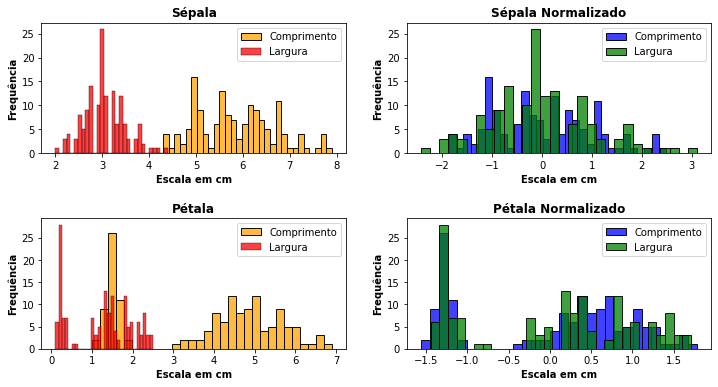

In [ ]:
import seaborn           as sns

#-------------- PANDAS COM ENTRADA NORMALIZADA ------------------|
#obj = {'sepal length': entrada_escala[:,0],
#        'sepal width': entrada_escala[:,1],
#       'petal length': entrada_escala[:,2],
#        'petal width': entrada_escala[:,3]}

obj = {'sepal length': dados_entrada_normalizados[:,0],
        'sepal width': dados_entrada_normalizados[:,1],
       'petal length': dados_entrada_normalizados[:,2],
        'petal width': dados_entrada_normalizados[:,3]}
entrada_dados_normalizado_df = pd.DataFrame(data = obj)

#***************************** GRÁFICO SÉPALA ******************************************|
largura_barras    = 30
comprimentro_01   = 12
altura_01         = 6
posicao_linha_01  = 2
posicao_coluna_01 = 2
space_vertical    = 0.5
space_horizontal  = 0.2

plt.figure(figsize = (comprimentro_01, altura_01))
plt.subplot(posicao_linha_01, posicao_coluna_01, 1)
sns.histplot(dados_isis['sepal length'], 
             color   = 'orange', 
             bins    = largura_barras, 
             label   = 'Comprimento')

sns.histplot(dados_isis['sepal width'],
             color   = 'red',    
             bins    = largura_barras, 
             label   = 'Largura')  

plt.title(     'Sépala',   fontweight = 'bold')
plt.ylabel('Frequência',   fontweight = 'bold')
plt.xlabel('Escala em cm', fontweight = 'bold')
plt.legend()


plt.subplot(posicao_linha_01, posicao_coluna_01, 2)
sns.histplot(entrada_dados_normalizado_df['sepal length'], 
             color   = 'blue',  
             bins    = largura_barras, 
             label   = 'Comprimento')

sns.histplot(entrada_dados_normalizado_df['sepal width'],  
             color   = 'green', 
             bins    = largura_barras, 
             label   = 'Largura')

plt.title('Sépala Normalizado', fontweight = 'bold')
plt.ylabel(       'Frequência', fontweight = 'bold')
plt.xlabel('Escala em cm',      fontweight = 'bold')
plt.legend()

#-------------------------------- GRÁFICO PÉTALA ---------------------------------------|

plt.subplot(posicao_linha_01, posicao_coluna_01, 3)
sns.histplot(dados_isis['petal length'], 
             color = 'orange', 
             bins  = largura_barras, 
             label = 'Comprimento')

sns.histplot(dados_isis['petal width'],  
             color = 'red',    
             bins  = largura_barras, 
             label = 'Largura')

plt.title(       'Pétala', fontweight = 'bold')
plt.ylabel(  'Frequência', fontweight = 'bold')
plt.xlabel('Escala em cm', fontweight = 'bold')
plt.legend()


plt.subplot(posicao_linha_01, posicao_coluna_01, 4)
sns.histplot(entrada_dados_normalizado_df['petal length'], 
             color = 'blue',  
             bins  = largura_barras, 
             label = 'Comprimento')

sns.histplot(entrada_dados_normalizado_df['petal width'],  
             color = 'green', 
             bins  = largura_barras, 
             label = 'Largura')

plt.title('Pétala Normalizado', fontweight = 'bold')
plt.ylabel(       'Frequência', fontweight = 'bold')
plt.xlabel(     'Escala em cm', fontweight = 'bold')
plt.legend()
plt.subplots_adjust(wspace = space_horizontal)
plt.subplots_adjust(hspace = space_vertical)

#04 - GRÁFICO DA DISTRIBUIÇÃO DE DADOS

indice_planta_alvo:  0
nome_planta_alvo:  Iris-setosa
indice_planta_alvo:  1
nome_planta_alvo:  Iris-versicolor
indice_planta_alvo:  2
nome_planta_alvo:  Iris-virginica


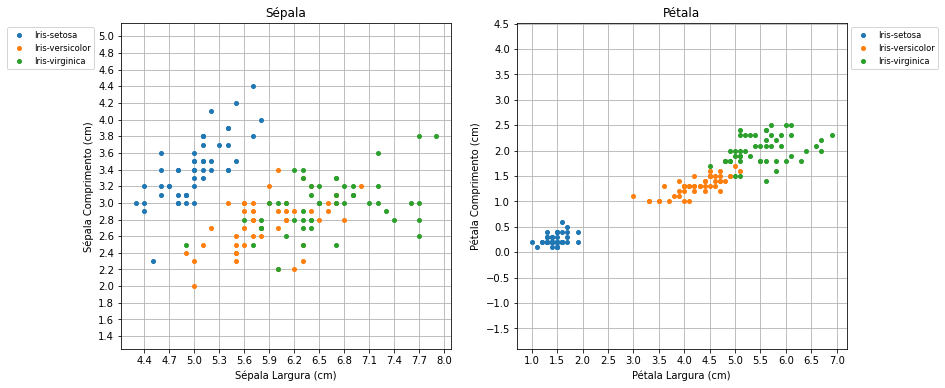

In [ ]:
import numpy as np
#------------------------ GRÁFICO DA SÉPALA ----------------------|
posicao_linha_02  = 1
posicao_coluna_02 = 2
comprimentro_02   = 13
altura_02         = 6
posicao_1_x1      = -0.07
posicao_1_y1      = 1
posicao_1_x2      = 1.29
posicao_1_y2      = 1

cont = 0
nome_planta_string = dados_isis["class"].unique()

plt.figure(figsize = (comprimentro_02,altura_02))
plt.subplot(posicao_linha_02, posicao_coluna_02, 1)

for indice_planta_alvo, nome_planta_alvo in enumerate(nome_planta_string):
  print("indice_planta_alvo: ", indice_planta_alvo)
  print("nome_planta_alvo: ", nome_planta_alvo)
  entrada_plot = dados_dimensao_entrada[nome_plantas_numerico == indice_planta_alvo]
  
  plt.plot(entrada_plot[:, 0],
           entrada_plot[:, 1],
           linestyle  = 'none',
           marker     = 'o',
           markersize = 4,
           label      = nome_planta_alvo)
  cont += 1

plt.title(                  'Sépala', color = 'black')
plt.xlabel(    'Sépala Largura (cm)', color = 'black')
plt.ylabel('Sépala Comprimento (cm)', color = 'black')
plt.xticks(np.arange(2,10,0.3)) # PLOTAR OS DOIS GRÁFICOS
plt.yticks(np.arange(0,6,0.2))# PLOTAR OS DOIS GRÁFICOS
plt.axis('equal')
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(posicao_1_x1, posicao_1_y1), markerscale = 1, fontsize = 'small')

#------------------------ GRÁFICO DA PÉTALA ----------------------|
plt.subplot(posicao_linha_02, posicao_coluna_02,2)
for indice_planta_alvo, nome_planta_alvo in enumerate(nome_planta_string):
    
    entrada_plot = dados_dimensao_entrada[nome_plantas_numerico == indice_planta_alvo]

    plt.plot( entrada_plot[:, 2], 
              entrada_plot[:, 3], 
              linestyle = 'none', 
              marker    = 'o',
              markersize = 4,
              label     = nome_planta_alvo)

plt.title('Pétala')
plt.xlabel('Pétala Largura (cm)',     color = 'black')
plt.ylabel('Pétala Comprimento (cm)', color = 'black')
plt.xticks(np.arange(0,9,0.5)) # PLOTAR OS DOIS GRÁFICOS
plt.yticks(np.arange(-2,5,0.5))# PLOTAR OS DOIS GRÁFICOS
plt.axis('equal')
plt.grid()
plt.legend(loc = 'upper right', bbox_to_anchor=(posicao_1_x2, posicao_1_y2), markerscale = 1, fontsize = 'small')

#05 - CONFIGURANDO A REDE NEURAL

In [ ]:
from keras.models                import Sequential
from keras.layers                import Dense
from keras.layers                import Dropout
#----------------- PARÂMETROS DA REDE NEURAL ----------------|
NEURONIO_ENTRADA    = entrada.shape[1]
#print("Número de Neurônios Entrada: ", NEURONIO_ENTRADA)

NEURONIO_SAIDA      = classe.shape[1]
#print("Número de Neurônios de Saída: ", NEURONIO_SAIDA)

TAXA_NEURO_IGNORADO = 0.2

NUM_CAMADA_OCULTA   = 2

NEURONIO_OCULTO     = round((NEURONIO_ENTRADA + NEURONIO_SAIDA)/2) # ORIGINAL
#NEURONIO_OCULTO     = (2*NEURONIO_ENTRADA) + 1 # MÉTODO DE KOLMOGOROV - TESTE

#  kernel_initializer='random_uniform': inicializa os pesos aleatoriamente

def criar_modelo_person(neuronio_entrada, 
                        neuronio_saida, 
                        neuronio_oculto, 
                        camada_oculta = 1, 
                        nome          = 'modelo'):
    
    print("Executando a função criar_modelo_person_{}".format(str(camada_oculta)))
    def criar_modelo():
        
        modelo = Sequential(name = nome)
        # fazer uma camada aqui e dentro do for sem input_dim
        for i in range(camada_oculta):
            if i == 0:
                modelo.add(Dense(units      = neuronio_oculto,
                                 input_dim  = neuronio_entrada,
                                 activation = 'relu',
                                 name       = 'Camada_Oculta_{}'.format(str(i+1))))
            else:
                modelo.add(Dense(units      = neuronio_oculto,
                                 activation = 'relu',
                                 name       = 'Camada_Oculta_{}'.format(str(i+1))))
            
            modelo.add(Dropout(rate = TAXA_NEURO_IGNORADO,
                               name = 'neur_ignorados_{}'.format(str(i+1))))
            
        modelo.add(Dense(units      = neuronio_saida,
                         activation = 'softmax',
                         name       = 'Camada_Saida'))
        
        modelo.compile(loss      = 'categorical_crossentropy',
                       optimizer = 'adam',
                       metrics   = ['accuracy'])
        
        return modelo
    
    return criar_modelo

modelos = [criar_modelo_person(NEURONIO_ENTRADA, 
                               NEURONIO_SAIDA, 
                               NEURONIO_OCULTO, 
                               i, 
                               'Modelo_{}'.format(i)) for i in range(1, NUM_CAMADA_OCULTA+1)]

for criar_modelo in modelos:
  criar_modelo().summary()

Executando a função criar_modelo_person_1
Executando a função criar_modelo_person_2
Model: "Modelo_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Camada_Oculta_1 (Dense)      (None, 4)                 20        
_________________________________________________________________
neur_ignorados_1 (Dropout)   (None, 4)                 0         
_________________________________________________________________
Camada_Saida (Dense)         (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
Model: "Modelo_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Camada_Oculta_1 (Dense)      (None, 4)                 20        
_________________________________________________________________
neur_ignorados_1 (Dropout)

#06 - TREINANDO A REDE NEURAL

In [ ]:
from keras.callbacks             import TensorBoard

TAMANHO_LOTE    = 20
EPOCAS          = 1000
BARRA_PROGRESSO = 1

dicionario_historico = {}

#import tensorflow as tf
import datetime

# PARA RODAR O GRAFICO TENSORBOARD DIGITAR NO CMD
# tensorboard --logdir logs\ --host localhost --port 6006

log_dir = "logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # TESTANDO

#log_callbacks = TensorBoard() # ORIGINAL
log_callbacks = TensorBoard(log_dir = log_dir) # TESTANDO

for criar_modelo in modelos:
    
    print("----------------- TREINAMENTO -----------------------------")
    modelo = criar_modelo()
    print('Modelo nome: ', modelo.name)
    
    chamada_historico = modelo.fit(entrada_treinamento, 
                                   classe_treinamento, 
                                   batch_size      = TAMANHO_LOTE,
                                   epochs          = EPOCAS,
                                   verbose         = BARRA_PROGRESSO,
                                   validation_data = (entrada_validacao, classe_validacao),
                                   callbacks       = [log_callbacks])
    
    ponto = modelo.evaluate(entrada_validacao, 
                            classe_validacao,
                            batch_size = TAMANHO_LOTE,
                            verbose    = BARRA_PROGRESSO)

    print(           'Épocas:', EPOCAS)
    print(   'Perda de Teste:', ponto[0])
    print('Teste de Precisão:', ponto[1])
    
    dicionario_historico[modelo.name] = [chamada_historico, modelo]

# VERIFICAÇÃO DOS PARAMÊTROS 
chamada_historico.history.keys()

----------------- TREINAMENTO -----------------------------
Modelo nome:  Modelo_1
Epoch 1/1000
5/5 [==============================] - 1s 61ms/step - loss: 1.2506 - accuracy: 0.2882 - val_loss: 1.2436 - val_accuracy: 0.1667
Epoch 2/1000
5/5 [==============================] - 0s 12ms/step - loss: 1.2086 - accuracy: 0.2583 - val_loss: 1.2248 - val_accuracy: 0.1667
Epoch 3/1000
5/5 [==============================] - 0s 12ms/step - loss: 1.2578 - accuracy: 0.2528 - val_loss: 1.2061 - val_accuracy: 0.2083
Epoch 4/1000
5/5 [==============================] - 0s 12ms/step - loss: 1.1281 - accuracy: 0.2958 - val_loss: 1.1880 - val_accuracy: 0.2083
Epoch 5/1000
5/5 [==============================] - 0s 11ms/step - loss: 1.1698 - accuracy: 0.2625 - val_loss: 1.1701 - val_accuracy: 0.2083
Epoch 6/1000
5/5 [==============================] - 0s 12ms/step - loss: 1.1503 - accuracy: 0.2993 - val_loss: 1.1534 - val_accuracy: 0.2500
Epoch 7/1000
5/5 [==============================] - 0s 13ms/step - loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#07 - GRÁFICO DA ACURÁCIA E PERDA (ERRO)

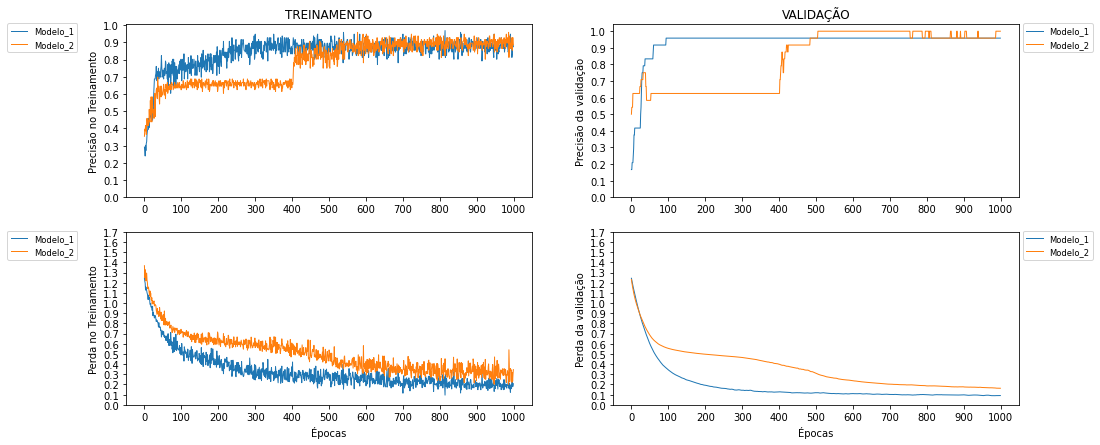

In [ ]:
#------- VARIÁVEIS DE CONFIGURAÇÃO DO GRÁFICO ----|
linha_03         = 2
coluna_03        = 2
altura_03        = 7
pos2_x00_10      = -0.11
pos2_y00_10      = 1.03
pos2_x01_11      = 1
pos2_y01_11      = 1.03
comprimentro_03  = 16
largura_linha_03 = 1
#-------------------------------------------------|

fig, axs = plt.subplots(linha_03,coluna_03, figsize = (comprimentro_03,altura_03))

for modelo_nome in dicionario_historico:
    acc      = dicionario_historico[modelo_nome][0].history['accuracy'] # ORIGINAL
    loss     = dicionario_historico[modelo_nome][0].history['loss'] # ORIGINAL
    val_acc  = dicionario_historico[modelo_nome][0].history['val_accuracy'] # ORIGINAL
    val_loss = dicionario_historico[modelo_nome][0].history['val_loss'] # ORIGINAL
    
    axs[0,0].plot(     acc, linewidth = largura_linha_03, label = modelo_nome)
    axs[1,0].plot(    loss, linewidth = largura_linha_03, label = modelo_nome)
    axs[0,1].plot( val_acc, linewidth = largura_linha_03, label = modelo_nome)
    axs[1,1].plot(val_loss, linewidth = largura_linha_03, label = modelo_nome)
  
axs[0,0].set_ylabel('Precisão no Treinamento', color = 'black')
axs[1,0].set_ylabel(   'Perda no Treinamento', color = 'black')
axs[0,1].set_ylabel(  'Precisão da validação', color = 'black')
axs[1,1].set_ylabel(     'Perda da validação', color = 'black')

axs[1,0].set_xlabel(    'Épocas', color = 'black')
axs[1,1].set_xlabel(    'Épocas', color = 'black')
axs[0,0].set_title('TREINAMENTO', color = 'black')
axs[0,1].set_title(  'VALIDAÇÃO', color = 'black')

axs[0,0].set_yticks(np.arange(0,         1.1, 0.1))
axs[0,0].set_xticks(np.arange(0, EPOCAS + 50, 100))

axs[0,1].set_yticks(np.arange(0,         1.1, 0.1))
axs[0,1].set_xticks(np.arange(0, EPOCAS + 50, 100))

axs[1,0].set_yticks(np.arange(0,         1.8, 0.1))
axs[1,0].set_xticks(np.arange(0, EPOCAS + 50, 100))

axs[1,1].set_yticks(np.arange(0,         1.8, 0.1))
axs[1,1].set_xticks(np.arange(0, EPOCAS + 50, 100))

axs[0,0].legend(loc='upper right', bbox_to_anchor=(pos2_x00_10,pos2_y00_10), markerscale=1.1, fontsize='small')
axs[1,0].legend(loc='upper right', bbox_to_anchor=(pos2_x00_10,pos2_y00_10), markerscale=1.1, fontsize='small')
axs[0,1].legend(loc='upper left',  bbox_to_anchor=(pos2_x01_11,pos2_y01_11), markerscale=1.1, fontsize='small')
axs[1,1].legend(loc='upper left',  bbox_to_anchor=(pos2_x01_11,pos2_y01_11), markerscale=1.1, fontsize='small')

plt.show()

#08 - GRÁFICO DA CURVA ROC-AUC

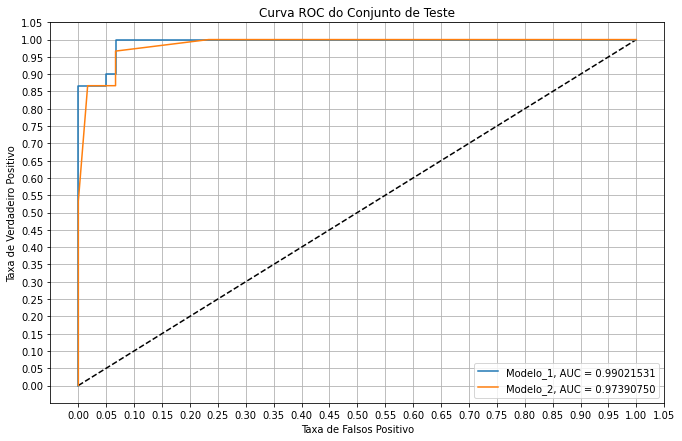

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

i                = 1
indice           = 0
melhor_result    = 0
altura_04        = 7
comprimentro_04  = 11
 
plt.figure(figsize = (comprimentro_04, altura_04))
plt.plot([0, 1], [0, 1], 'k--') # FUNÇÃO IDENTIDADE

for modelo_nome in dicionario_historico:
    
    modelo           = dicionario_historico[modelo_nome][1]
    saida_teste_prev = modelo.predict(entrada_teste)
    tfp, tvp, limite = roc_curve(classe_teste.ravel(), saida_teste_prev.ravel())
    
    #plt.plot(tfp, tvp, label = '{}, AUC = {:.8f}'.format(modelo_nome, auc(tfp, tvp)))
    plt.plot(tfp, tvp, label = '{}, AUC = {:.8f}'.format(modelo_nome, roc_auc_score(classe_teste, saida_teste_prev)))
    #print('Limite:', limite)
    #print('roc_auc_score:', roc_auc_score(classe_teste, saida_teste_prev))
    #print('auc:', auc(tfp, tvp))
    #print('----------------------------------------------')

    if(melhor_result < auc(tfp, tvp)):
        melhor_result = auc(tfp, tvp)
        indice        = i
        #print("Melhor resultado:", melhor_result)
        #print("Indice:", indice)
      
    i += 1
      

plt.xlabel(      'Taxa de Falsos Positivo', color = 'black')
plt.ylabel(  'Taxa de Verdadeiro Positivo', color = 'black')
plt.title('Curva ROC do Conjunto de Teste', color = 'black')
plt.xticks(np.arange(0,1.1,0.05)) # PLOTAR OS DOIS GRÁFICOS
plt.yticks(np.arange(0,1.1,0.05))# PLOTAR OS DOIS GRÁFICOS
plt.grid(True)
plt.legend()
plt.show()

#09 - GRÁFICO ROC-AUC PARA CADA RÓTULO

3


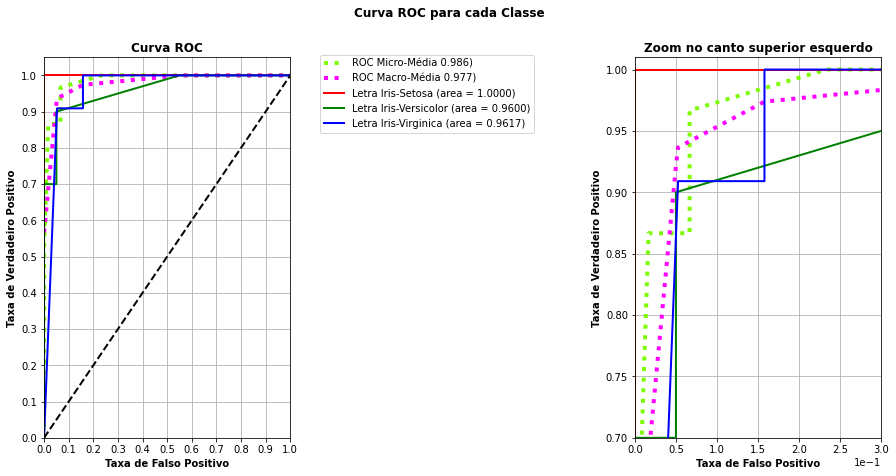

In [ ]:
fpr_dic     = dict()
tpr_dic     = dict()
roc_auc_dic = dict()

n_classes = saida_teste_prev.shape[1]

print(n_classes)

lw        = 2
menor_tpr = 0

for i in range(n_classes):

    #fpr_dic[i], tpr_dic[i], _ = roc_curve(teste_classe[:,i], saida_previsao[:,i]) # OK
    fpr_dic[i], tpr_dic[i], _ = roc_curve(classe_teste[:,i], 
                                          saida_teste_prev[:,i], 
                                          pos_label = 1)
    roc_auc_dic[i]            = auc(fpr_dic[i], tpr_dic[i])
    #---------- MENOR ÁREA ---------------------
    media_tpr = sum(tpr_dic[i])/3
    #print("media_tpr[{}]: {}".format(i, media_tpr))
    
    if(menor_tpr < media_tpr):
        menor_tpr = media_tpr
        #print("media_tpr[{}]: {}".format(i, media_tpr))
        #print(" menor_tpr[{}]: {}".format(i, menor_tpr))
    #-------------------------------------------
    #print("fpr_dic[{}]: ".format(i), fpr_dic[i]) # DEBUGAR

# CALCULA A CURVA ROC MICRO-MÉDIA E ÁREA ROC    
fpr_dic['micro'], tpr_dic['micro'], _ = roc_curve(classe_teste.ravel(),
                                                  saida_teste_prev.ravel())

roc_auc_dic['micro'] = auc(fpr_dic['micro'], 
                           tpr_dic['micro'])

# PRIMEIRO MESCLA TODAS AS TAXAS DE FALSOS POSITIVOS0
all_fpr = np.unique(np.concatenate([fpr_dic[i] for i in range(n_classes)]))

# EM SEGUIDA INTERPOLA TODAS AS CURVAS ROC NESSES PONTOS
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    #mean_tpr += interp(all_fpr, fpr_dic[i], tpr_dic[i]) # 01 OK
    mean_tpr += np.interp(all_fpr, fpr_dic[i], tpr_dic[i]) # 02 OK

# FINALMENTE CALCULA A MÉDIA E AUC
mean_tpr /= n_classes

fpr_dic['macro']     = all_fpr
tpr_dic['macro']     = mean_tpr
roc_auc_dic['macro'] = auc(fpr_dic['macro'], tpr_dic['macro'])


from itertools       import cycle

letra_dic_13 = {0:"Iris-Setosa", 
                1:"Iris-Versicolor", 
                2:"Iris-Virginica"}

comprimento_03 = 15
altura_03      = 7
linha_03       = 1
coluna_03      = 3
x0_2           = 0
xn_2           = 1
xi_2           = 0.1
y0_2           = 0       
yn_2           = 1
yi_2           = 0.1

plt.figure(figsize = (comprimento_03, altura_03))
plt.subplot(linha_03, coluna_03, 1)


plt.plot(fpr_dic['micro'], 
         tpr_dic['micro'], 
         label = 'ROC Micro-Média {0:0.3f})'.format(roc_auc_dic['micro']),
         color = 'lawngreen', 
         linestyle = ':',
         linewidth = 4)

plt.plot(fpr_dic['macro'], 
         tpr_dic['macro'], 
         label = 'ROC Macro-Média {0:0.3f})'.format(roc_auc_dic['macro']), 
         color = 'magenta', 
         linestyle = ':',
         linewidth = 4)


colors = cycle(['red',   # Iris-Setosa
                'green', # Iris-Versicolor
                'blue']) # Iris-Virginica

for i, color in zip(range(n_classes), colors):
    letras_1 = letra_dic_13[i]
    #print('letras_1[{}]: {}'.format(i, letras_1))
    plt.plot(fpr_dic[i], 
             tpr_dic[i], 
             color = color, 
             lw    = lw,
             label = 'Letra {0} (area = {1:0.4f})'.format(letras_1, roc_auc_dic[i]))
    

plt.plot([0, 1], [0,1], 'k--', lw = lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falso Positivo",      fontweight = 'bold')
plt.ylabel("Taxa de Verdadeiro Positivo", fontweight = 'bold')
plt.xticks(np.arange(x0_2, xn_2+0.1, xi_2))
plt.yticks(np.arange(y0_2, yn_2+0.1, yi_2))
plt.title("Curva ROC", fontweight = 'bold')
plt.legend(loc = 'upper right', bbox_to_anchor = (2.01, 1.02))
plt.grid()

#------------ ZOOM NO CANTO SUPERIOR ESQUERDO DO GRÁFICO -------
x0_zoom = 0
xn_zoom = 0.3
#y0_zoom = menor_tpr - 0.1
y0_zoom = 0.7
yn_zoom = 1.01

plt.subplot(linha_03, coluna_03, 3)
plt.xlim(x0_zoom, xn_zoom)
plt.ylim(y0_zoom, yn_zoom)


plt.plot(fpr_dic['micro'],
         tpr_dic['micro'],
         label = 'ROC Micro-Média {0:0.3f})'.format(roc_auc_dic['micro']),
         color = 'lawngreen',
         linestyle = ':',
         linewidth = 4)

plt.plot(fpr_dic['macro'], 
         tpr_dic['macro'], 
         label = 'ROC Macro-Média {0:0.3f})'.format(roc_auc_dic['macro']), 
         color = 'magenta', 
         linestyle = ':',
         linewidth = 4)

colors = cycle(['red',   # Iris-Setosa
                'green', # Iris-Versicolor
                'blue']) # Iris-Virginica


for i, color in zip(range(n_classes), colors):
    letras_2 = letra_dic_13[i]
    plt.plot(fpr_dic[i], 
             tpr_dic[i], 
             color = color, 
             lw    = lw,
             label = 'Letra {0} (area = {1:0.4f})'.format(letras_2, roc_auc_dic[i]))

plt.plot([0, 1], [0,1], 'k--', lw = lw)
plt.xlabel("Taxa de Falso Positivo", fontweight = 'bold')
plt.ylabel("Taxa de Verdadeiro Positivo", fontweight = 'bold')
#plt.title("Curva ROC de cada Digito (Zoom no canto superior esquerdo)")
plt.title("Zoom no canto superior esquerdo", fontweight = 'bold')
# A LINHA ABAIXO DEIXA O EIXO 'x' EM NOTAÇÃO CIENTIFICA
plt.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
#plt.legend(loc = 'lower right')
#plt.legend(loc = 'upper right', bbox_to_anchor = (2, 1.02))
plt.suptitle("Curva ROC para cada Classe", fontweight = 'bold')
plt.grid()
plt.show()

#10 - GRÁFICO DA MATRIZ DE CONFUSÃO

1/1 [==============================] - 0s 13ms/step


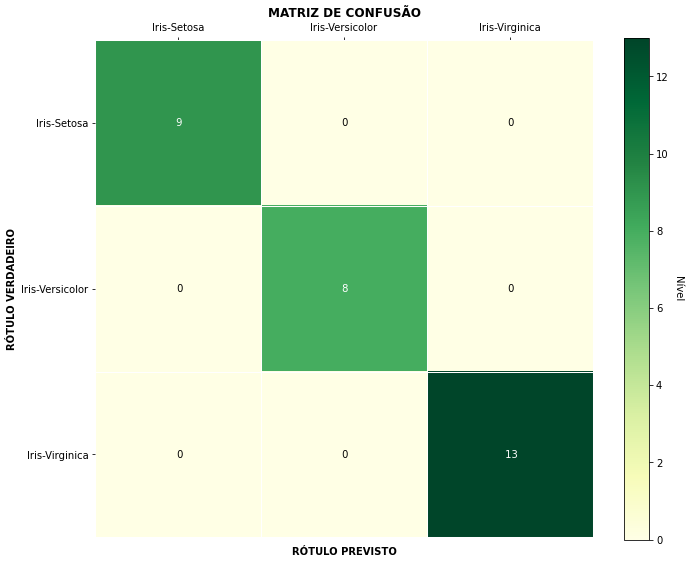

In [ ]:
import matplotlib
from sklearn.metrics import confusion_matrix

y_pred      = modelo.predict(entrada_teste, batch_size = 32, verbose = 1)
y_predicted = np.argmax(y_pred, axis = 1)

saida_teste_classe_bin = np.argmax(saida_teste_prev, axis = 1)

y_cm = confusion_matrix(saida_teste_classe_bin, y_predicted)
y_df_cm = pd.DataFrame(y_cm, range(3), range(3))

def heatmap(data,row_labels,col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()
        
    im = ax.imshow(data, **kwargs)
    
    cbar = ax.figure.colorbar(im, ax = ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation = -90, va = "bottom")
    
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel("RÓTULO PREVISTO",   fontweight = 'bold')
    ax.set_ylabel("RÓTULO VERDADEIRO", fontweight = 'bold')
    
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
    
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
        
    ax.set_xticks(np.arange(data.shape[1] + 1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1.035)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}", textcolor = ["black", "white"],threshold=None, **textkw):
    
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    
    kw = dict(horizontalalignment = "center",
              verticalalignment = "center")
    
    kw.update(textkw)
    
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
        
    texts = []
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolor[int(im.norm(data[i,j]) > threshold)])
            text = im.axes.text(j,i, valfmt(data[i,j], None), **kw)
            texts.append(text)
            
    return texts

alfab = ["Iris-Setosa", 
         "Iris-Versicolor", 
         "Iris-Virginica"]

fig, ax = plt.subplots(figsize = (10,8))

im, cbar = heatmap(y_cm, alfab, alfab, ax=ax, cmap = "YlGn", cbarlabel = "Nível")
texts = annotate_heatmap(im, valfmt = "{x: d}")

ax.set_title("MATRIZ DE CONFUSÃO", fontweight = 'bold')
fig.tight_layout()
plt.show()